## Part IV (Dynamic Hedging)

Given: S0= 100, σ = 0.2, r = 5%, T = 1/12 year and K = 100

Using `Black-Scholes model` to simulate the stock price, we sell at-the-money call option, and hedge N times during the life of the call option to test the final profit and loss of our dynamic hedging strategy.  (Assume there are 21 trading days over the month.)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
np.random.seed(2020)

In [2]:
# Black-Scholes Model

def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [3]:
# Stock Price
    
def StockPrice(S, r, t, sigma, W):
    return S*np.exp((r*t-0.5*sigma**2*t)+sigma*W)

In [4]:
# Phi and PsiB
    
def Phi(S, K, r, sigma, T, t):
        d1 = (np.log(S/K) + (r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
        return norm.cdf(d1)

def PsiB(S, K, r, sigma, T, t):
        d2 = (np.log(S/K) + (r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
        return -K*np.exp(-r*(T-t))*norm.cdf(d2)

In [5]:
# Brownian Motion
    
def simulate_Brownian_Motion(paths, steps, T):
    deltaT = T/steps
    t = np.linspace(0, T, steps+1)
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, steps)]
    return t, np.cumsum(np.sqrt(deltaT) * X, axis=1)

In [6]:
# Hedging Error
    
def HedgingError(S0, K, r, sigma, T, t, x):
    S = pd.DataFrame(StockPrice(S0, r, t, sigma, x))
    phi = pd.DataFrame(Phi(S, K, r, sigma, T, t))
    psib = pd.DataFrame(PsiB(S, K, r, sigma, T, t))
    hedging_error = pd.DataFrame(phi.values[:,:-1]*np.diff(S) + psib.values[:,:-1]*r*(T/len(t)))
    hedging_error['Sum'] = hedging_error.apply(np.sum, axis = 1)
    payoff = np.maximum(S-K, 0)
    call_option = BlackScholesCall(S0, K, r, sigma, T)
    final_PL = hedging_error['Sum'].values + call_option - payoff.iloc[:,-1]
    return final_PL

In [7]:
# Parameters
    
S0 = 100
sigma = 0.2
r = 0.05
T = 1/12
K = 100
N1 = 21
N2 = 84
paths = 50000

t, x = simulate_Brownian_Motion(paths, N1, T)
t2, x2 = simulate_Brownian_Motion(paths, N2, T)

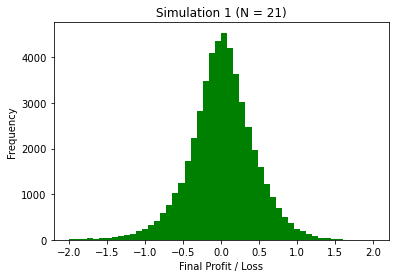

In [8]:
# First Simulation
    
simulation1 = HedgingError(S0, K, r, sigma, T, t, x)

plt.hist(simulation1, bins=50, range=[-2, 2], facecolor='green', align='mid')
plt.title('Simulation 1 (N = 21)')
plt.xlabel('Final Profit / Loss')
plt.ylabel('Frequency')
plt.show()

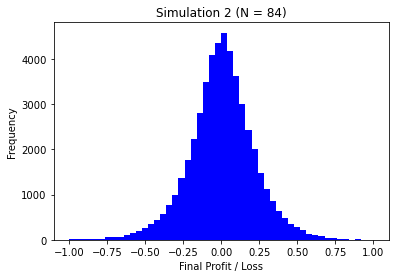

In [9]:
# Second Simulation
    
simulation2 = HedgingError(S0, K, r, sigma, T, t2, x2)

plt.hist(simulation2, bins=50, range=[-1, 1], facecolor='blue', align='mid')
plt.title('Simulation 2 (N = 84)')
plt.xlabel('Final Profit / Loss')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Mean P&L
mean_s1 = np.mean(simulation1)
mean_s2 = np.mean(simulation2)
print(mean_s1)
print(mean_s2)

0.009125983120376116
0.0037130937317739745


In [11]:
# SD of P&L
sd_s1 = np.std(simulation1)
sd_s2 = np.std(simulation2)
print(sd_s1)
print(sd_s2)

0.42716060789168697
0.21812509376087436
